In [1]:
import os
import pickle
import numpy as np
import wikipediaapi
from collections import Counter

# This script reformats the wikipedia link dataset found at: http://snap.stanford.edu/data/index.html

Run first.

1. collects the entire set of categories in the wiki-topcats dataset.

2. uses a wikipedia API to get the supercategories (domains) of these categories.

3. tallies number of categories per domain

4. drops domains outside of given range and if they include any bogus terms

5. selects out categories that are included in these domains

6. saves category: domain mappings



### Input
`wiki-topcats-categories.txt`
This file assigned categories to pages. Each line is a single string that takes the following format: `Category:Buprestoidea; 301 302 303`, where the category is given first with some wrapper text, than a list of all pages that are from that category.


### Output
Some redundancy in the below, to allow resumption from multiple places.

`rawCategories.npy`
A list of all categories in `wiki-topcats-categories.txt`, formatted as an ordered array according to line number.

`numDomainsPerCatRaw.npy`
Numpy array that gives the number of supercategories (domains) for each category in `raw_categories.npy`; ordered.

`domains2020.npy`
Numpy array keeping ordered, unique set of domains.

`domains_to_names2020`
Dictionary that maps each domain index to its name.

`categories_to_names2020`
Dictionary that maps each new category index to category names.

`categories_to_domains2020.p`
Dictionary that maps each (included) category (re)index to one or more of the kept domains, reindexed.


In [1]:
wDir = '.' # the top level working directory
dataDir = '{0}/WIKIdata'.format(wDir) # where to find and store the data. 
# Unlink from git if necessary by adding to .gitignore in wDir; large files.

lower_limit = 3 # minimum number of categories per domain
upper_limit = 20 # maximum number of categories per domain

# show current content of data directory
os.listdir(dataDir)

NameError: name 'os' is not defined

In [3]:
# function library
def return_categories(page):
    categories = page.categories
    tempCats = []
    for k in categories.keys():
        tempCats.append(k.replace('Category:', ''))
    return tempCats

In [4]:
# get list of all categories, each as a simple string without wrapper text
categoryFile = '{0}/wiki-topcats-categories.txt'.format(dataDir)
categories = []
with open(categoryFile, 'r') as f:
    for line in f:
        cat = line.split(';')[0]
        cat2 = cat.replace('Category:', '')
        categories.append(cat2)
print('First 5 categories: ', categories[:5], '\n There are {0} categories in wiki-topcats category file.'.format(len(categories)))  
f.close()
np.save('rawCategories.npy', np.asarray(categories))

First 5 categories:  ['Buprestoidea', 'People_from_Worcester', 'Skin_conditions_resulting_from_physical_factors', 'Visual_kei_bands', 'Japanese_rock_music_groups'] 
 There are 17364 categories in wiki-topcats category file.


0 categories done
1000 categories done
2000 categories done
3000 categories done
4000 categories done
5000 categories done
6000 categories done
7000 categories done
8000 categories done
9000 categories done
10000 categories done
11000 categories done
12000 categories done
13000 categories done
14000 categories done
15000 categories done
16000 categories done
17000 categories done
17364


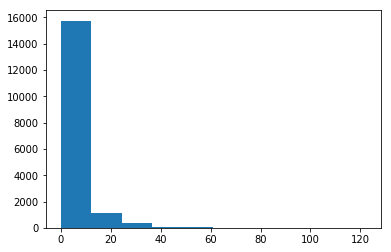

In [5]:
# initialize api
wiki_wiki = wikipediaapi.Wikipedia('en')

# compile domain list
domainPool = []
numDomainsPerCat = []
for i, cat in enumerate(categories):
    if i % 1000 == 0:
        print('{0} categories done'.format(i))
        
    page_py = wiki_wiki.page(cat) # get wikipedia page for category
    tempCats = return_categories(page_py) # return the domains that contain it (supercategories)
    numDomainsPerCat.append(len(tempCats)) # append the number of these
    domainPool.append(tempCats) # append the domains

print(len(domainPool))

plt.hist(numDomainsPerCat)
np.save('{}/numDomainsPerCatRaw.npy'.format(dataDir), np.array(numDomainsPerCat))

In [14]:
# flatten over categories to get all domains (NB, these will not be unique)
domainPoolAll = [item for sublist in domainPool for item in sublist]

# create a dictionary that maps string to number of occurences
total = Counter(domainPoolAll)

# keys are domains
ks = list(total.keys())

# create matching list of counts 
vs = np.int_([total[x] for x in ks])

# return indices where domain has category counts in (lower_limit, upper_limit) categories
candidateDomainsIdx = np.where((lower_limit <= vs) & (vs <= upper_limit))[0] 
candidateDomains = [ks[x] for x in candidateDomainsIdx]

# remove bogus terms (chosen from inspection)
domains = np.asarray([i for i in candidateDomains if not ('Wiki' in i or 'December' in i or 'ISO' in i or 'November' in i or 'October' in i or 'September' in i or 'August' in i or 'July' in i or 'June' in i or 'May' in i or 'April' in i or 'March' in i or 'February' in i or 'January' in i or 'CS1' in i or  'Page' in i or 'page' in i or 'ISBN' in i or 'dates' in i or 'Article' in i or 'article' in i or 'references' in i or 'Nazi'in i)])

np.save('{0}/domains2020.npy'.format(dataDir), domains)

# create a mapping dictionary, that associates a domain index (key) with a domain name (value)
domainDict = {}
for i, domain in enumerate(domains):
    domainDict[i] = domain
    
# save new domain idx to domain name
with open('{0}/domains_to_names2020.p'.format(dataDir), 'wb') as pfile:
    pickle.dump(domainDict, pfile)
    


{0: 'Laboulbeniomycetes', 1: 'Euphorbia', 2: 'RNA', 3: 'Anatomy', 4: 'History_of_medicine', 5: 'Bacteriology', 6: 'Metabolism', 7: 'Microbiology', 8: 'Membrane_biology', 9: 'Proteins', 10: 'Cell_biology', 11: 'Enzymes', 12: 'DNA', 13: 'Molecular_biology', 14: 'Biotechnology', 15: 'Immune_system', 16: 'Immunology', 17: 'Human_cells', 18: 'Laboratory_techniques', 19: 'Biochemistry', 20: 'Developmental_biology', 21: 'Digestive_system', 22: 'Pediatrics', 23: 'Stereochemistry', 24: 'Functional_groups', 25: 'Organic_chemistry', 26: 'Chemical_reactions', 27: 'Chlorides', 28: 'Physical_chemistry', 29: 'Potassium_compounds', 30: 'IARC_Group_2B_carcinogens', 31: 'Food_additives', 32: 'Sodium_compounds', 33: 'Sequenced_genomes', 34: 'Physiology', 35: 'Carboxylic_acids', 36: 'Medical_Subject_Headings', 37: 'Alkenes', 38: 'Nutrition', 39: 'Food_science', 40: 'Pharmacology', 41: 'Lactams', 42: 'Amines', 43: 'Medical_emergencies', 44: 'Autoimmune_diseases', 45: 'Eli_Lilly_and_Company', 46: 'Medical_s

In [13]:
# filter categories to only return categories that are in one or more of the included domains

# make doubly sure domains are unique (should have been achieved by the above)
domainsSet = set(domains)


# this dictionary will map (reindexed) category indices to domain indices
mappings = {}

# this dictionary will reindex kept categories only 
categoriesUpdated = {}

# keep track of how many categories are kept and how many are discarded
skipped = 0
counter = 0

# As a reminder, domainPool is a list of list, where each list represents an unfiltered category,
# and each sublist the domains it is under

for i, categoryList in enumerate(domainPool):
    
    # find if any of category's domains kept
    jointMappings = domainsSet.intersection(set(categoryList))
    
    # if in category's domain is a kept domain
    if jointMappings:
        print(categories[i])
        # reindex with kept categories and their mappings
        categoriesUpdated[counter] = categories[i]
        # for a nonempty domain map, find which domains kept.
        mappings[counter] = [np.where(domains == x)[0][0] for x in jointMappings]
        print([domains[x] for x in mappings[counter]])
        counter += 1
    else:
        skipped += 1
        
        
print('{} categories skipped'.format(skipped))

# save category reindex to category name mapping
with open('{0}/categories_to_names2020.p'.format(dataDir), 'wb') as pfile:
    pickle.dump(categoriesUpdated, pfile)

# save category idx: domain idx(s) mapping
with open('{0}/categories_to_domains2020.p'.format(dataDir), 'wb') as pfile:
    pickle.dump(mappings, pfile)
    


{0: [0], 1: [1, 4, 3, 2], 2: [6, 7, 5], 3: [8], 4: [9], 5: [10], 6: [11], 7: [8], 8: [12], 9: [6], 10: [13, 6], 11: [14, 11], 12: [5], 13: [13, 6], 14: [15, 5], 15: [16], 16: [16], 17: [17], 18: [18], 19: [6, 19, 5], 20: [20], 21: [11], 22: [21], 23: [22], 24: [24, 23], 25: [24, 22], 26: [22], 27: [25, 27, 26], 28: [28], 29: [30, 29, 27, 31], 30: [32], 31: [33], 32: [30, 29, 27, 31], 33: [17], 34: [8], 35: [23], 36: [34], 37: [23], 38: [33], 39: [33], 40: [15, 19], 41: [23], 42: [23], 43: [21], 44: [35], 45: [37, 15, 36], 46: [38], 47: [23], 48: [23], 49: [14, 19], 50: [39, 40], 51: [13], 52: [40, 41], 53: [41], 54: [16], 55: [23], 56: [24], 57: [42], 58: [23], 59: [6], 60: [6], 61: [6], 62: [10], 63: [42], 64: [43, 44], 65: [45, 46], 66: [40], 67: [47, 48, 26], 68: [23], 69: [23], 70: [23], 71: [12, 41], 72: [13, 6], 73: [14, 49], 74: [23], 75: [23, 47, 48, 49], 76: [23], 77: [50, 19, 17], 78: [33, 51], 79: [6], 80: [52], 81: [53, 54, 55], 82: [25], 83: [56, 58, 57], 84: [59], 85: [22